In [ ]:
import pandas as pd
import pyextremes 
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import distance
import math
import os
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\Majestic.csv").tail(50000)
df['Track ID'] = df['Track ID'].astype(int)
df=df[df['Track ID']>=1]

# print(df.count())
df.head(100)
unique_tracks_per_type = df.groupby('Type')['Track ID'].nunique()
print(unique_tracks_per_type)
print(f'total {sum(unique_tracks_per_type)}')

Type
 Bus              3
 Car             52
 Light Truck      6
 Motorcycle     110
 Pedestrian      65
 Tuk-Tuk         72
Name: Track ID, dtype: int64
total 308


In [4]:
df=df[['Track ID','TimeStamp','Type','X','Y']].dropna()
Dx=[]
Dy=[]
i=0
while i<len(df):
    if ((i+1)==len(df)):
        pass
    elif(df['Track ID'].iloc[i+1]!=df['Track ID'].iloc[i]):
        pass
    else:
        dt=df['TimeStamp'].iloc[i+1]-df['TimeStamp'].iloc[i]
        if dt==0:
            dt=0.16
        dx=df['X'].iloc[i+1]-df['X'].iloc[i]
        dy=df['Y'].iloc[i+1]-df['Y'].iloc[i]

    Dx.append(dx)
    Dy.append(dy)
    i+=1

df['dx']=Dx
df['dy']=Dy
df['dx']=df['dx'].fillna(0)
df['dy']=df['dy'].fillna(0)


In [5]:
df['vx']=df['dx']/0.16
df['vy']=df['dy']/0.16

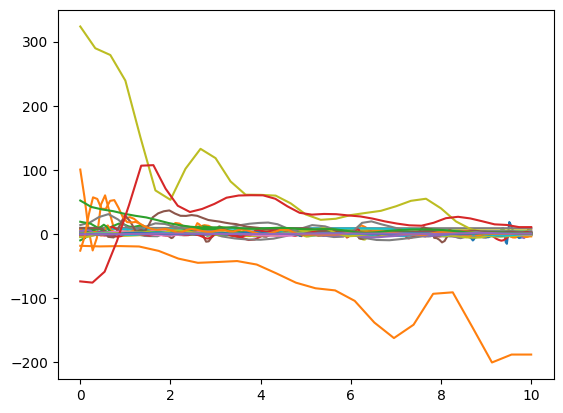

In [6]:

ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
# print(ped)
# # print(len(ped))
for id in ped:
    z=df[df['Track ID']==id]['vx'].count()
    x=np.linspace(0,10,z)
    plt.plot(x,df[df['Track ID']==id]['vx'])



In [7]:
Dvx=[]
Dvy=[]
i=0
while i<len(df):
    if ((i+1)==len(df)):
        pass
    elif(df['Track ID'].iloc[i+1]!=df['Track ID'].iloc[i]):
        pass
    else:
        dt=df['TimeStamp'].iloc[i+1]-df['TimeStamp'].iloc[i]
        if dt==0:
            dt=0.16
        dvx=df['vx'].iloc[i+1]-df['vx'].iloc[i]
        dvy=df['vy'].iloc[i+1]-df['vy'].iloc[i]

    Dvx.append(dvx)
    Dvy.append(dvy)
    i+=1

df['dvx']=Dvx
df['dvy']=Dvy
df['dvx']=df['dvx'].fillna(0)
df['dvy']=df['dvy'].fillna(0)

In [8]:
df['ax']=df['dvx']/0.16
df['ay']=df['dvy']/0.16
df['avg_ax'] = df.groupby('Track ID')['ax'].transform(lambda x: x.abs().mean())
df['avg_ay'] = df.groupby('Track ID')['ay'].transform(lambda x: x.abs().mean())
df['avg_ay'] = df['avg_ay'].fillna(0)
df['avg_ax'] = df['avg_ax'].fillna(0)

In [9]:
# df.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/calVal01.csv")

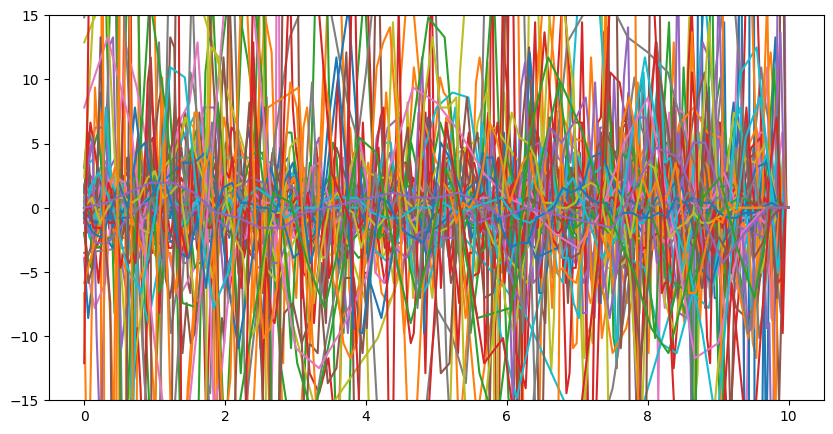

In [10]:

ped=df[df['Type']==' Pedestrian']['Track ID'].unique()
# print(ped)
# # print(len(ped))
plt.figure(figsize=(10,5))
for id in ped:
    z=df[df['Track ID']==id]['ax'].count()
    x=np.linspace(0,10,z)
    plt.plot(x,df[df['Track ID']==id]['ax'])
    plt.ylim(-15,15)


In [11]:
print(f'total= {len(ped)}')
print(
        len(
            df[(df['Type']==' Pedestrian')&
                ((df['avg_ax']<=2) &
                (df['avg_ay']<=2))               
               ]['Track ID'].unique()
            )
    )

track_ID=df[(df['Type']==' Pedestrian')&
                ((df['avg_ax']<=2) &
                (df['avg_ay']<=2))               
               ]['Track ID'].unique()
track_ID

total= 65
23


array([15466, 15503, 15514, 15522, 15530, 15562, 15602, 15628, 15650,
       15660, 15693, 15727, 15738, 15743, 15770, 15827, 15830, 15880,
       15895, 15991, 16103, 16153, 16171])

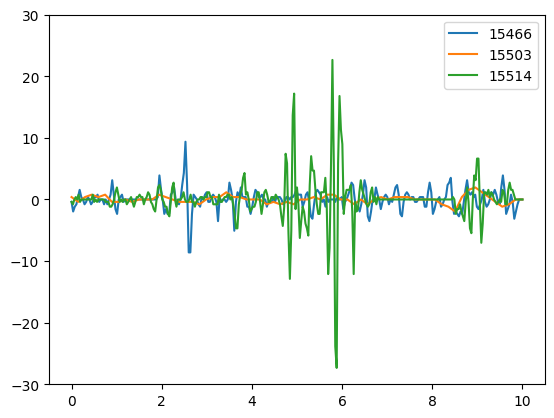

In [20]:
counts=0
for id in track_ID:
    z=df[df['Track ID']==id]['ax'].count()
    x=np.linspace(0,10,z)
    plt.plot(x,df[df['Track ID']==id]['ax'],label= id)
    plt.ylim(-30,30)
    plt.legend()
    counts+=1
    if counts>2:
        break

In [13]:
df[
    (df['Type']!=' Pedestrian')&
    ((abs(df['vx'])>=0)&
    (abs(df['vx'])<=0.2)) &  
    ((abs(df['vy'])>=0)&
    (abs(df['vy'])<=0.2))
    ]['Track ID'].unique()
    

array([15471, 15474, 15481, 15482, 15490, 15491, 15492, 15505, 15512,
       15525, 15538, 15543, 15548, 15567, 15572, 15582, 15605, 15609,
       15624, 15625, 15631, 15632, 15636, 15639, 15652, 15654, 15657,
       15663, 15666, 15672, 15680, 15684, 15690, 15691, 15695, 15698,
       15703, 15705, 15706, 15708, 15711, 15713, 15715, 15716, 15718,
       15719, 15721, 15724, 15725, 15733, 15735, 15736, 15741, 15744,
       15748, 15753, 15754, 15756, 15757, 15762, 15763, 15765, 15769,
       15772, 15774, 15775, 15778, 15781, 15782, 15787, 15788, 15790,
       15791, 15792, 15793, 15797, 15799, 15801, 15803, 15804, 15807,
       15809, 15810, 15812, 15815, 15818, 15819, 15824, 15829, 15831,
       15833, 15837, 15838, 15840, 15842, 15852, 15857, 15861, 15862,
       15866, 15867, 15872, 15873, 15874, 15875, 15879, 15881, 15882,
       15893, 15894, 15898, 15900, 15904, 15907, 15910, 15914, 15924,
       15925, 15932, 15934, 15935, 15941, 15954, 15961, 15966, 15967,
       15968, 15973,

In [14]:
df[
    (df['dx']**2 + df['dy']**2) > 1.73**2
]['Track ID'].unique()

array([15474, 15476, 15481, 15490, 15491, 15492, 15501, 15505, 15506,
       15512, 15516, 15518, 15525, 15531, 15534, 15539, 15543, 15548,
       15554, 15559, 15570, 15572, 15582, 15585, 15588, 15590, 15595,
       15600, 15603, 15605, 15606, 15607, 15609, 15610, 15611, 15613,
       15614, 15616, 15617, 15618, 15621, 15623, 15624, 15625, 15629,
       15630, 15631, 15632, 15635, 15637, 15639, 15640, 15641, 15643,
       15647, 15648, 15654, 15659, 15664, 15666, 15672, 15691, 15703,
       15705, 15706, 15708, 15710, 15711, 15713, 15715, 15719, 15721,
       15724, 15725, 15735, 15737, 15739, 15741, 15744, 15747, 15748,
       15763, 15765, 15771, 15774, 15775, 15778, 15779, 15781, 15787,
       15788, 15790, 15791, 15793, 15797, 15798, 15799, 15803, 15806,
       15807, 15809, 15819, 15824, 15825, 15829, 15831, 15833, 15837,
       15838, 15842, 15843, 15849, 15852, 15854, 15860, 15861, 15862,
       15866, 15872, 15874, 15878, 15879, 15881, 15882, 15887, 15889,
       15891, 15893,

In [15]:
len(df[
    (df['ax']**2 + df['ay']**2) > 8**2
]['Track ID'].unique()
)

278

In [16]:
ped.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'